# Classification multiClass iris

## A. Data Preprocessing

1. Import library 

In [21]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

2. insert and read dataset

In [22]:
df = pd.read_csv('/tmp/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


3. Delete unnecessary column

In [23]:
df = df.drop(columns='Id')

4. next, we have to do ``one hot encoding`` because our label is categorical data. <br>fungsi ``get_dummies(columnLabel)`` make it easier

In [24]:
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


5. Then, we combine resulted column one hot encoding and drop species column cause we dont use it.

In [25]:
    new_df = pd.concat([df, category], axis=1)
    new_df = new_df.drop(columns='Species')
    new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


6. we convert dataframe to numpy array

In [26]:
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

7. we seperate label and attribute

In [27]:
    # Pilih 4 kolom pertama untuk dijadikan sebagai atribut
    X = dataset[:,0:4]
    # Pilih 3 kolom terakhir sebagai label
    y = dataset[:,4:7]

8. we do Normalize data in order data can be learnt easier by jst 

In [28]:
    # Normalize
    min_max_scaler = preprocessing.MinMaxScaler()
    X_scale = min_max_scaler.fit_transform(X)
    X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

9. Split data train (70%) and data testing (30%)

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

## B. Build Model

10. we build model architect with 3 layers. activation function ``softmax`` is general Activation function for multiclass classification

In [30]:
    model = Sequential([    
                        Dense(64, activation='relu', input_shape=(4,)),    
                        Dense(64, activation='relu'),    
                        Dense(3, activation='softmax'),])

11. we build model compile to decide optimizer,loss, metrics

In [31]:
    model.compile(optimizer='Adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

12. we implement our model to dataset

12.1. Selanjutnya kita buat kelas callback. Pada baris pertama lihatlah  bahwa kelas callback kita harus inherit tf.keras.callbacks.Callback. Selanjutnya kita buat fungsi yang paling penting yaitu on_epoch_end(). Fungsi inilah yang akan kita gunakan untuk memberitahu model agar berhenti melakukan pelatihan ketika telah mencapai target.

Selanjutnya kode if(logs.get(‘accuracy’)>0.9) sangat intuitif menunjukkan kalau kode itu memiliki arti “jika akurasi lebih besar dari 0.9 maka eksekusi perintah berikutnya”. Kita juga dapat menulis kode print(“\nAkurasi telah mencapai >90%!”) untuk ditampilkan ketika callback aktif.

Kode self.model.stop_training = True adalah kode yang memberi tahu model untuk menghentikan pelatihan. Setelah kelas ini dibuat kita buat objek dari kelas tersebut.

In [20]:
    import tensorflow as tf
    class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.9):
          print("\nAkurasi telah mencapai >90%!")
          self.model.stop_training = True
    callbacks = myCallback()

In [32]:
hist = model.fit(X_train, Y_train, epochs=100, callbacks=[callbacks])

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1161 - accuracy: 0.3238
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0728 - accuracy: 0.6571
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0379 - accuracy: 0.5619
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0045 - accuracy: 0.6762
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9735 - accuracy: 0.6762
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9423 - accuracy: 0.6762
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9117 - accuracy: 0.6762
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8802 - accuracy: 0.6762
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8468 - accuracy: 0.6762
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8137 - accuracy: 0.6762
Epoch 11/100
4/4 [===========

13. Now, we evaluate our trained model

In [33]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.4174 - accuracy: 0.9333


[0.41735297441482544, 0.9333333373069763]

## C. show plot loss and accuration

In [15]:
    import matplotlib.pyplot as plt

Objek history menampung informasi dari akurasi dan loss model pada setiap epoch di proses pelatihan. Sehingga kita bisa membuat plot akurasi atau loss dari model. 

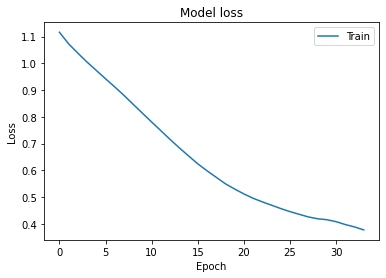

In [34]:
    plt.plot(hist.history['loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc='upper right')
    plt.show()

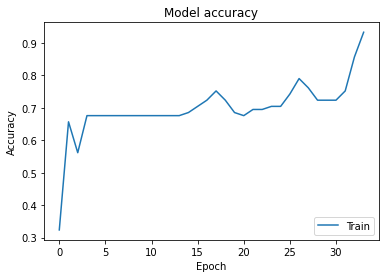

In [35]:
    plt.plot(hist.history['accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc='lower right')
    plt.show()